<h1>Vectors</h1>

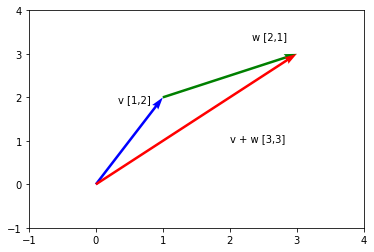

In [143]:
import matplotlib.pyplot as plt
%matplotlib inline 

# adding the vectors [1, 2] and [2, 1] results in [1 + 2, 2 + 1] or [3, 3]
v = [1, 2]
w = [2, 1]

vw = [[0, 0, 1, 2], [1, 2, 2, 1], [0, 0, 3, 3]]
X, Y, U, V = zip(*vw)
plt.figure()
ax = plt.gca()
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color=['b','g','r'])
plt.annotate("v [1,2]", xy=v, xytext=(-45, -5), textcoords='offset points')
plt.annotate("w [2,1]", xy=(3,3), xytext=(-45, 15), textcoords='offset points')
plt.annotate("v + w [3,3]", xy=w)
plt.axis([-1, 4, -1, 4])
plt.draw()
plt.show()

In [95]:
def vector_add(v, w):
    """adds corresponding elements"""
    return [vi + wi for vi, wi in zip(v, w)]

vector_add(v, w)

[3, 3]

In [96]:
def vector_subtract(v, w):
    """subtracts corresponding elements"""
    return [vi - wi for vi, wi in zip(v, w)]

vector_subtract(v, w)

[-1, 1]

In [99]:
from functools import reduce

def vector_sum(vectors):
    """sums all corresponding elements"""
    return reduce(vector_add, vectors)

vector_sum([[1,2], [2,1], [2,2]])

[5, 5]

In [100]:
def scalar_multiply(c, v):
    """c is a number, v is a vector"""
    return [c * vi for vi in v]

scalar_multiply(5, [-1, 3])

[-5, 15]

In [124]:
def vector_mean(vectors):
    """compute the vector whose ith element is the mean of the
        ith elements of the input vectors"""
    return scalar_multiply(1/ len(vectors), vector_sum(vectors))

vector_mean([[1,5], [2,3], [2,7]])

[1.6666666666666665, 5.0]

In [106]:
def dot(v, w):
    """v1 * w1 + ... + vn * wn"""
    return sum(vi * wi for vi, wi in zip(v, w))

dot(v, w)

4

[-0.5, 3, -0.5, 2]

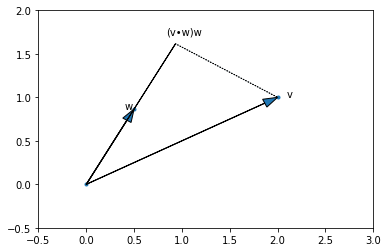

In [145]:
import math

v = [2, 1]
w = [math.sqrt(.25), math.sqrt(.75)]
c = dot(v, w)
vonw = scalar_multiply(c, w)
o = [0,0]

plt.arrow(0, 0, v[0], v[1],
          width=0.002, head_width=.1, length_includes_head=True)
plt.annotate("v", v, xytext=[v[0] + 0.1, v[1]])
plt.arrow(0 ,0, w[0], w[1],
          width=0.002, head_width=.1, length_includes_head=True)
plt.annotate("w", w, xytext=[w[0] - 0.1, w[1]])
plt.arrow(0, 0, vonw[0], vonw[1], length_includes_head=True)
plt.annotate(u"(v•w)w", vonw, xytext=[vonw[0] - 0.1, vonw[1] + 0.1])
plt.arrow(v[0], v[1], vonw[0] - v[0], vonw[1] - v[1],
          linestyle='dotted', length_includes_head=True)
plt.scatter(*zip(v,w,o),marker='.')
plt.axis([-.5, 3, -.5, 2])
plt.show()

In [108]:
def sum_of_squares(v):
    """v1 * v1 + ... + vn * vn"""
    return dot(v, v)

sum_of_squares([1,2])

5

In [109]:
def magnitude(v):
    return math.sqrt(sum_of_squares(v))

magnitude([1,2])

2.23606797749979

In [111]:
# distance between two vectors
# sqrt((v1 - w1)^2 + ... + (vn - wn)^2)

def squared_distance(v, w):
    """(v1 - w1) ** 2 + ... + (vn - wn) ** 2"""
    return sum_of_squares(vector_subtract(v, w))

squared_distance(v, w)

2

In [113]:
def distance(v, w):
#     return math.sqrt(squared_distance(v, w)) 
    return magnitude(vector_subtract(v, w))

distance(v, w)

1.4142135623730951

<h1>Matrices</h1>

In [114]:
A = [[1, 2, 3], 
     [4, 5, 6]] # A has 2 rows and 3 columns
B = [[1, 2], 
     [3, 4],
     [5, 6]] # B has 3 rows and 2 columns

In [115]:
def shape(A):
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0
    return (num_rows, num_cols)

shape(A)

(2, 3)

In [116]:
def get_row(A, i):
    return A[i]

get_row(A, 1)

[4, 5, 6]

In [117]:
def get_col(A, j):
    return [Ai[j] for Ai in A]

get_col(A, 1)

[2, 5]

In [123]:
def make_matrix(num_rows, num_cols, entry_fn):
    """returns a num_rows x num_cols matrix
        whose (i,j)th entry is entry_fn(i, j)"""
    return [[entry_fn(i,j) for j in range(num_cols)] for i in range(num_rows)]

def is_diagonal(i, j):
    """1's on the 'diagonal', 0's everywhere else"""
    return 1 if i == j else 0

make_matrix(5, 5, is_diagonal)

[[1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1]]